### Assignment1

Remember -> submission using itslearning, both notebook and github repo *deadline on 22.11.2021*

#### Task 1 (3 points):

Regression $\to$ Superconductivity Data Set

The goal here is to predict the critical temperature based on the features extracted.

https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

* Fit two regression models to predict the critical temperature. Report the score with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained score as a function of the chosen parameter. Plot the coefficient magnitudes for the best model. 

In [42]:
import pandas as pd
from pathlib import Path
import numpy as np

import zipfile, requests, io

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip'
file_name = 'train.csv'
# Put the dataset into a dataframe and merge date and timestamp columns into one column
Data = pd.read_csv(zipfile.ZipFile(io.BytesIO(requests.get(url, stream=True).content)).open(file_name))

# Descriptive statistics of the DataFrame
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number_of_elements,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.0000
mean_atomic_mass,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.9804
wtd_mean_atomic_mass,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.9804
gmean_atomic_mass,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.9804
wtd_gmean_atomic_mass,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.9804
...,...,...,...,...,...,...,...,...
range_Valence,21263.0,2.041010,1.242345,0.000000,1.000000,2.000000,3.000000,6.0000
wtd_range_Valence,21263.0,1.483007,0.978176,0.000000,0.921454,1.063077,1.918400,6.9922
std_Valence,21263.0,0.839342,0.484676,0.000000,0.451754,0.800000,1.200000,3.0000
wtd_std_Valence,21263.0,0.673987,0.455580,0.000000,0.306892,0.500000,1.020436,3.0000


In [6]:
Data.shape

(21263, 82)

In [8]:
# remove any object values
Data = Data.select_dtypes(exclude=['object'])
Data.shape
# there weren't any

(21263, 82)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = Data.drop("critical_temp", axis = 1)

# split data sample to X/y & train/test
X_train, X_test, y_train, y_test = train_test_split(X, Data.critical_temp, random_state=42)

#Convert dataframes to numpy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Train the model using the training sets
lr = LinearRegression().fit(X_train, y_train)

# Calculate R-squared for both test / train samples
print("Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr.score(X_test, y_test)))

Training set score: 0.740
Test set score: 0.728


In [44]:
from sklearn.linear_model import ElasticNet
#Setup an ElasticNet
# define model
EN_model = ElasticNet(max_iter = 10000,tol=0.001)

# Train the model using the training sets
EN_model = EN_model.fit(X_train, y_train)

# Calculate R-squared for both test / train samples
print('Training set score: ' + str(round(EN_model.score(X_train,y_train),3)))
print('Test set score: ' + str(round(EN_model.score(X_test,y_test),3)))

Training set score: 0.719
Test set score: 0.706


In [45]:
# Different values for the model parameter alpha
alpha = [0.0001,0.001,0.01,0.1,0.5, 0.7, 0.9]

rows = ['train', 'test']
score = pd.DataFrame(columns = rows, index= alpha)

for param in range(0,len(alpha)):
    EN_model = ElasticNet(alpha = alpha[param])
    # Train the model using the training sets
    EN_model = EN_model.fit(X_train, y_train)
    # Calculate R-squared for both test / train samples ElasticNet
    score.at[ alpha[param],'train'] = round(EN_model.score(X_train,y_train),3)
    score.at[alpha[param],'test'] = round(EN_model.score(X_test,y_test),3)
score   

C:\Users\alext\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2470858.835058255, tolerance: 1880.0097924087256

C:\Users\alext\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2491484.915589937, tolerance: 1880.0097924087256

C:\Users\alext\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2536155.0622316063, tolerance: 1880.0097924087256

C:\Users\alext\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2579738.85887519, tol

,train,test
0.0001,0.738,0.726
0.0010,0.737,0.725
0.0100,0.733,0.721
0.1000,0.726,0.714
0.5000,0.722,0.708
0.7000,0.721,0.708
0.9000,0.72,0.707


In [46]:
import plotly.express as px

fig = px.line(score, x=score.index, y=[score.train, score.test], title='Score by parameter')

fig.show()

As we can see in the figure above, the test score is decreasing for higher alpha. Similarly, the distance between the test and train score also increases with alpha. Therefore, the bias and variance of this model, have a positive relationship with the parameter alpha.

In [18]:
EN_model = ElasticNet(alpha = 0.0001)
# Train the model using the training sets
EN_model = EN_model.fit(X_train, y_train)
print("The coefficient values:")
print(EN_model.coef_.round(3))
print("the intercept:")
print(EN_model.intercept_.round(3))

The coefficient values:
[-4.6280e+00  5.1100e-01 -4.5800e-01 -1.9600e-01  2.3900e-01 -3.8665e+01
  1.0341e+01  2.1400e-01  1.9000e-02 -4.0000e-01 -1.1900e-01  8.9000e-02
  6.6000e-02 -9.1000e-02 -4.5000e-02  4.8297e+01  3.6258e+01  6.8000e-02
  1.5000e-02 -1.9500e-01 -9.0000e-03  1.1430e+00  6.7000e-01 -1.4110e+00
 -3.3600e-01 -1.9322e+01  2.6542e+01  2.4800e-01 -9.5000e-02 -1.1560e+00
  4.0100e-01 -6.0000e-03  0.0000e+00  2.0000e-03  2.0000e-03  1.8523e+01
 -1.4553e+01 -2.0000e-03 -0.0000e+00  6.0000e-03 -1.0000e-03 -2.1100e-01
  6.7000e-01  2.7800e-01 -7.1900e-01  9.8700e-01 -2.0017e+01 -3.9400e-01
 -1.5500e-01  1.3550e+00 -6.3600e-01  9.4200e-01 -1.3490e+00 -7.4800e-01
  1.0140e+00 -1.4717e+01  2.2456e+01 -4.2200e-01  5.1900e-01  1.5300e-01
  2.8500e-01 -5.4000e-02  5.4900e-01 -6.5000e-02 -3.4000e-01  6.6590e+00
  2.6540e+00 -8.9000e-02 -2.2700e-01  2.5800e-01 -1.0000e-02 -8.0200e+00
  4.0910e+00  1.2484e+01 -8.1780e+00  1.7849e+01 -6.0964e+01  5.0940e+00
  5.5700e-01 -1.0880e+00 -1

C:\Users\alext\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2470858.835058255, tolerance: 1880.0097924087256



#### Task 2 (3 points):

Binary classification $\to$ Default of credit card clients Data Set

The goal here is to predict the default payment next month.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

* Fit two binary classification models to predict the client's credit card default. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained accuracy as a function of the chosen parameter.. Plot the feature importance. 

In [54]:
# read the data
Data_credit =  pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls",skiprows=[0])
Data_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [29]:
Data_credit.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = Data_credit.drop("default payment next month", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Data_credit["default payment next month"], random_state=42)
#Convert dataframes to numpy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
logr = LogisticRegression(max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logr.score(X_test, y_test)))

Training set score: 0.777
Test set score: 0.783


In [61]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print("Training set score: {:.3f}".format(KNreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(KNreg.score(X_test, y_test)))

Training set score: 0.785
Test set score: 0.782


In [106]:
# Different values for the model parameter alpha
min_samples_leaf = [2, 7, 9, 12, 20, 25, 30, 40, 50]
 
columns = ['train', 'test']
score = pd.DataFrame(columns = columns, index= neighbors)

for param in range(0, len(min_samples_leaf)):
    tree = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf[param])
    # Train the model using the training sets
    tree = tree.fit(X_train, y_train)
    # Calculate R-squared for both test / train samples ElasticNet
    score.at[min_samples_leaf[param],'train'] = round(tree.score(X_train,y_train),3)
    score.at[min_samples_leaf[param],'test'] = round(tree.score(X_test,y_test),3)
score 

,train,test
2,0.963,0.744
7,0.884,0.756
9,0.872,0.762
12,0.858,0.772
20,0.843,0.794
25,0.837,0.802
30,0.834,0.804
40,0.83,0.812
50,0.828,0.812


In [107]:
import plotly.express as px

fig = px.line(score, x=score.index, y=[score.train, score.test], title='Score by parameter')

fig.show()

As wecan see in the figure above, lower values of our parameter min_samples_leaf has a high training score but much lower test score. As we increase the value of the model's parameter, the training score converges to 0.83 and below, but the test score  converges to around 81. 


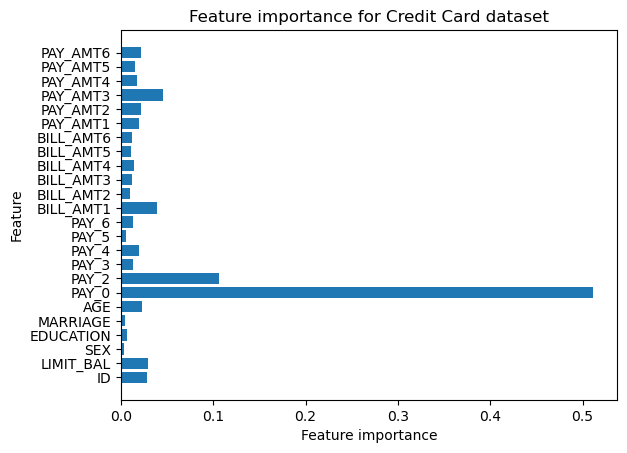

In [105]:
import matplotlib.pyplot as plt
X_names = list(X.columns)

#The model with the lowest bias/variance
tree = DecisionTreeClassifier(min_samples_leaf = 40)
# Train the model using the training sets
tree = tree.fit(X_train, y_train)


n_features = X.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_names)
plt.title('Feature importance for Credit Card dataset')
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#### Task 3 (9 points): 

Multiclass & binary classification $\to$ Drug consumption (quantified) Data Set

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Data Set Information:

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

* Fit two multiclass classification models to predict two selected features out of 18. Use numerical values to represent each class. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the new obtained accuracy as a function of the chosen parameter. 
* Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes. 
* Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
 - one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).
 
 Comment your results, and point which selection of classes have better accuracy.

In [160]:
# writing to the file
drug_data =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", header=None)

col_names = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

drug_data.columns = col_names 

drug_data.dtypes

ID             int64
Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [149]:
drug_columns = ['LSD', 'Mushrooms']
drug_new = drug_data
# Encode columns into numeric data
from sklearn.preprocessing import LabelEncoder
for column in drug_columns:
    le = LabelEncoder()
    drug_new[column] = le.fit_transform(drug_new[column])
    

In [150]:
drug_new = drug_new.select_dtypes(exclude=['object'])

In [151]:
X = drug_new.drop(["LSD","Mushrooms"], axis = 1)

X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X, drug_new["LSD"], random_state=42)
#Convert dataframes to numpy arrays
X_train_drug = X_train_drug.to_numpy()
y_train_drug = y_train_drug.to_numpy()
X_test_drug = X_test_drug.to_numpy()
y_test_drug = y_test_drug.to_numpy()
logr_drug = LogisticRegression(max_iter=10000,multi_class='multinomial').fit(X_train_drug, y_train_drug)

print("Training set score: {:.3f}".format(logr_drug.score(X_train_drug, y_train_drug)))
print("Test set score: {:.3f}".format(logr_drug.score(X_test_drug, y_test_drug)))

Training set score: 0.615
Test set score: 0.578


In [85]:
KNreg = KNeighborsClassifier()
KNreg.fit(X_train_drug,y_train_drug)

print("Training set score: {:.3f}".format(KNreg.score(X_train_drug, y_train_drug)))
print("Test set score: {:.3f}".format(KNreg.score(X_test_drug, y_test_drug)))

Training set score: 0.642
Test set score: 0.536


In [86]:
X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X, drug_new["Mushrooms"], random_state=42)
#Convert dataframes to numpy arrays
X_train_drug = X_train_drug.to_numpy()
y_train_drug = y_train_drug.to_numpy()
X_test_drug = X_test_drug.to_numpy()
y_test_drug = y_test_drug.to_numpy()
logr_drug = LogisticRegression(max_iter=10000,multi_class='multinomial').fit(X_train_drug, y_train_drug)

print("Training set score: {:.3f}".format(logr_drug.score(X_train_drug, y_train_drug)))
print("Test set score: {:.3f}".format(logr_drug.score(X_test_drug, y_test_drug)))

Training set score: 0.564
Test set score: 0.519


In [87]:
KNreg = KNeighborsClassifier()
KNreg.fit(X_train_drug,y_train_drug)

print("Training set score: {:.3f}".format(KNreg.score(X_train_drug, y_train_drug)))
print("Test set score: {:.3f}".format(KNreg.score(X_test_drug, y_test_drug)))

Training set score: 0.623
Test set score: 0.445


In [88]:
C = [0.0001, 0.001, 0.01, 0.1, 1]
rows = ['test','train']
score = pd.DataFrame(columns = rows, index= l1_ratio)

for param in range(5):
    logr_drug = LogisticRegression(max_iter= 10000, C=C[param])
    # Train the model using the training sets
    logr_drug = logr_drug.fit(X_train_drug, y_train_drug)
    # Calculate R-squared for both test / train samples ElasticNet
    score.at[l1_ratio[param],'train'] = round(logr_drug.score(X_train_drug,y_train_drug),3)
    score.at[l1_ratio[param],'test'] = round(logr_drug.score(X_test_drug,y_test_drug),3)
score 

,test,train
0.0001,0.511,0.524
0.0010,0.508,0.533
0.0100,0.525,0.554
0.1000,0.511,0.569
1.0000,0.519,0.564


In [ ]:
fig = px.line(score, x=score.index, y=[score.train, score.test], title='Score by parameter')

fig.show()

In [152]:
columns_drug = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'Meth','Nicotine', 'Semer', 'VSA']
rows = ['test','train']
score = pd.DataFrame(columns = rows, index= columns_drug)

# Encode columns into numeric data
from sklearn.preprocessing import LabelEncoder
for column in columns_drug:
    le = LabelEncoder()
    drug_data[column] = le.fit_transform(drug_data[column])
    


for param in range(0, len(columns_drug)):
    X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X, drug_data[columns_drug[param]], random_state=42)
    #Convert dataframes to numpy arrays
    X_train_drug = X_train_drug.to_numpy()
    y_train_drug = y_train_drug.to_numpy()
    X_test_drug = X_test_drug.to_numpy()
    y_test_drug = y_test_drug.to_numpy()
    logr_drug = LogisticRegression(max_iter= 10000, C=0.1)
    # Train the model using the training sets
    logr_drug = logr_drug.fit(X_train_drug, y_train_drug)
    # Calculate R-squared for both test / train samples 
    score.at[columns_drug[param],'train'] = round(logr_drug.score(X_train_drug,y_train_drug),3)
    score.at[columns_drug[param],'test'] = round(logr_drug.score(X_test_drug,y_test_drug),3)
score 
    

,test,train
Alcohol,0.411,0.41
Amphet,0.519,0.518
Amyl,0.695,0.691
Benzos,0.547,0.528
Caff,0.739,0.733
Cannabis,0.405,0.425
Choc,0.419,0.444
Coke,0.523,0.56
Crack,0.881,0.856
Ecstasy,0.54,0.568


In [169]:
drugs_new = drug_data.copy()
columns_drug = ['Crack', 'Heroin', 'Ketamine']

for col in columns_drug:
    drugs_new.loc[(drugs_new[col] == 6) | (drugs_new[col] == 5) | (drugs_new[col] == 4) | (drugs_new[col] == 3) | (drugs_new[col] == 1) | (drugs_new[col] == 0)  ,col] = 1
    drugs_new.loc[(drugs_new[col] == 2) ,col] = 0
   

In [170]:
score = pd.DataFrame(columns = rows, index= columns_drug)
for param in range(0, len(columns_drug)):
    X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X, drugs_new[columns_drug[param]], random_state=42)
    #Convert dataframes to numpy arrays
    X_train_drug = X_train_drug.to_numpy()
    y_train_drug = y_train_drug.to_numpy()
    X_test_drug = X_test_drug.to_numpy()
    y_test_drug = y_test_drug.to_numpy()
    logr_drug = LogisticRegression(max_iter= 10000, C=0.1)
    # Train the model using the training sets
    logr_drug = logr_drug.fit(X_train_drug, y_train_drug)
    # Calculate R-squared for both test / train samples 
    score.at[columns_drug[param],'train'] = round(logr_drug.score(X_train_drug,y_train_drug),3)
    score.at[columns_drug[param],'test'] = round(logr_drug.score(X_test_drug,y_test_drug),3)
score 
    
    

,test,train
Crack,0.881,0.856
Heroin,0.858,0.849
Ketamine,0.801,0.786


In [171]:
drugs_new = drug_data.copy()
columns_drug = ['Crack', 'Heroin', 'Ketamine']
for col in columns_drug:
    drugs_new.loc[(drugs_new[col] == 6) | (drugs_new[col] == 5) | (drugs_new[col] == 4) | (drugs_new[col] == 1) | (drugs_new[col] == 0)  ,col] = 1
    drugs_new.loc[(drugs_new[col] == 2) | (drugs_new[col] == 3),col] = 0

In [172]:
score = pd.DataFrame(columns = rows, index= columns_drug)
for param in range(0, len(columns_drug)):
    X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X, drugs_new[columns_drug[param]], random_state=42)
    #Convert dataframes to numpy arrays
    X_train_drug = X_train_drug.to_numpy()
    y_train_drug = y_train_drug.to_numpy()
    X_test_drug = X_test_drug.to_numpy()
    y_test_drug = y_test_drug.to_numpy()
    logr_drug = LogisticRegression(max_iter= 10000, C=0.1)
    # Train the model using the training sets
    logr_drug = logr_drug.fit(X_train_drug, y_train_drug)
    # Calculate R-squared for both test / train samples 
    score.at[columns_drug[param],'train'] = round(logr_drug.score(X_train_drug,y_train_drug),3)
    score.at[columns_drug[param],'test'] = round(logr_drug.score(X_test_drug,y_test_drug),3)
score 

,test,train
Crack,0.881,0.856
Heroin,0.858,0.849
Ketamine,0.801,0.786


In [176]:
drugs_new = drug_data.copy()
columns_drug = ['Crack', 'Heroin', 'Ketamine']
for col in columns_drug:
    drugs_new.loc[(drugs_new[col] == 6) | (drugs_new[col] == 5) | (drugs_new[col] == 1) | (drugs_new[col] == 0)  ,col] = 1
    drugs_new.loc[(drugs_new[col] == 2) | (drugs_new[col] == 3) | (drugs_new[col] == 4),col] = 0
    

In [ ]:
score = pd.DataFrame(columns = rows, index= columns_drug)
for param in range(0, len(columns_drug)):
    X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X, drugs_new[columns_drug[param]], random_state=42)
    #Convert dataframes to numpy arrays
    X_train_drug = X_train_drug.to_numpy()
    y_train_drug = y_train_drug.to_numpy()
    X_test_drug = X_test_drug.to_numpy()
    y_test_drug = y_test_drug.to_numpy()
    logr_drug = LogisticRegression(max_iter= 10000, C=0.1)
    # Train the model using the training sets
    logr_drug = logr_drug.fit(X_train_drug, y_train_drug)
    # Calculate R-squared for both test / train samples 
    score.at[columns_drug[param],'train'] = round(logr_drug.score(X_train_drug,y_train_drug),3)
    score.at[columns_drug[param],'test'] = round(logr_drug.score(X_test_drug,y_test_drug),3)
score 

In [ ]:
    # Train the model using the training sets
    logr_drug = logr_drug.fit(X_train_drug, y_train_drug)
    # Calculate R-squared for both test / train samples 
    score.at[columns_drug[param],'train'] = round(logr_drug.score(X_train_drug,y_train_drug),3)
    score.at[columns_drug[param],'test'] = round(logr_drug.score(X_test_drug,y_test_drug),3)
score 

In [47]:
! git push 

To https://github.com/AlexTouvras/supervised_learning
   0c9dcc4..94bc885  AlexBranch -> AlexBranch


In [86]:
! git checkout -b AlexBranch

fatal: A branch named 'AlexBranch' already exists.


In [87]:
! git status

On branch AlexBranch
Your branch is up to date with 'origin/AlexBranch'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Assignment_1.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	superconduct.zip

no changes added to commit (use "git add" and/or "git commit -a")


In [90]:
! git commit -am "some changes but not ready yet"

[AlexBranch 86d41cf] some changes but not ready yet

The file will have its original line endings in your working directory



 1 file changed, 519 insertions(+), 191 deletions(-)


In [91]:
#First puch to new branch
! git push --set-upstream origin AlexBranch

To https://github.com/AlexTouvras/supervised_learning
   94bc885..86d41cf  AlexBranch -> AlexBranch


In [94]:
#otherwise
! git push 

Everything up-to-date
